<a href="https://colab.research.google.com/github/akashy22asuedu/MAT_421/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Runtime initialization
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Lagrange interpolation

Lagrange interpolation uses the set of Lagrange basis polynomials, defined by P<sub>i</sub>(x) = ∏(<sub>j=1,j≠i</sub><sup>n</sup>(x-x<sub>j</sub>)/(x<sub>i</sub>-x<sub>j</sub>)), to form an interpolant L(x) = ∑<sub>i=1</sub><sup>n</sup>(y<sub>i</sub>P<sub>i</sub>(x)).

Essentially, the polynomial basis is constructed so that each polynomial in the basis corresponds to an x value in the data set, has the value of 1 at that x value, and a value of 0 at all other values of x in the data set. Then, each of these polynomials are scaled according to the y value for the corresponding x value (so instead of having a value of 1 at the corresponding x, they have a value of y) and are summed up to create the final interpolant.

Example: Find the interpolant for the points (0,0), (1,1), (2,1) using Lagrange basis polynomials.

In [2]:
x = [0, 1, 2]
y = [0, 1, 1]

The Lagrange basis for the interpolant corresponding to the given points is {0.5x<sup>2</sup>-1.5x+1, -x<sup>2</sup>+2x, 0.5x<sup>2</sup>-0.5x}. This can be found using the definition given above. The construction of the interpolant is shown below.

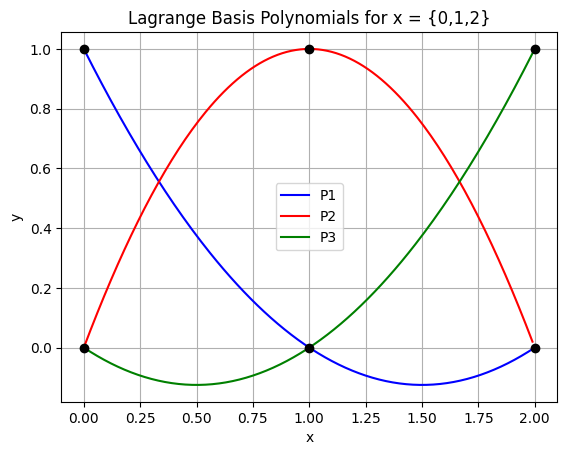

In [3]:
# These define the basis polynomials
# The coefficients are written from the lowest degree
P1 = poly.Polynomial([1, -1.5,  0.5])
P2 = poly.Polynomial([0,  2  , -1  ])
P3 = poly.Polynomial([0, -0.5,  0.5])

# Plotting
x_new = np.arange(min(x), max(x), 0.01)
fig = plt.figure()
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')
plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials for x = {0,1,2}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

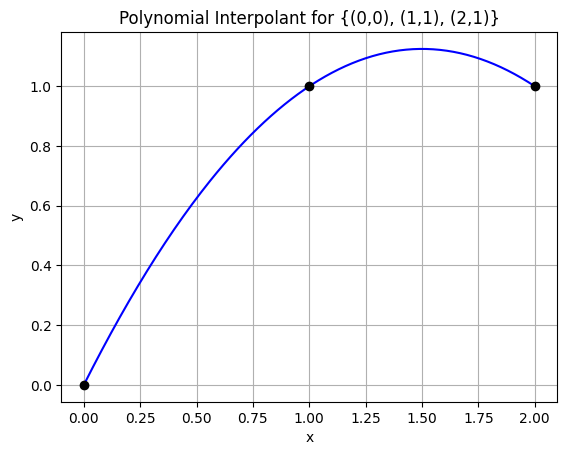

In [4]:
# Construction of the interpolant using the basis
L = y[0]*P1 + y[1]*P2 + y[2]*P3

# Plotting
plt.plot(x_new, L(x_new), 'b', x, y, 'ko')
plt.title('Polynomial Interpolant for {(0,0), (1,1), (2,1)}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


# Newton's Interpolation

Newton's Interpolation uses Newton's polynomial, defined by f(x) = ∑<sub>i=0</sub><sup>n</sup>(a<sub>i</sub>n<sub>i</sub>(x)) where n<sub>i</sub>(x) = ∏<sub>j=0</sub><sup>i-1</sup>(x-x<sub>j</sub>).

Newton's polynomial allows for calculating the polynomial coefficients by using divided differences. Divided differences are defined by the iteration equation f[x<sub>k</sub>, ..., x<sub>0</sub>] = (f[x<sub>k</sub>, ..., x<sub>1</sub>] - f[x<sub>k-1</sub>, ..., x<sub>0</sub>])/(x<sub>k</sub>-x<sub>0</sub>) where f[x<sub>0</sub>] = y<sub>0</sub>.

By rearranging Newton's polynomial to solve for each coefficient, starting from a<sub>0</sub> you can find that a<sub>i</sub> = f[x<sub>i</sub>, ..., x<sub>0</sub>]. The recurrence relation allows for calculating subsequent coefficients from previous ones; adding a new point to a data set does not change previously calculated coefficients of Newton's polynomial.

The divided differences can be stored in a table (triangular matrix) where each column stores all divided differences of continuous subsequences of a given length, from the complete sequence of data points, and each row corressponds to which element the subsequence ends at. The first row would contain the coefficients of Newton's Polynomials.

Example: Find the interpolant for the points (0,0), (1,1), (2,1) using Newton's polynomial.

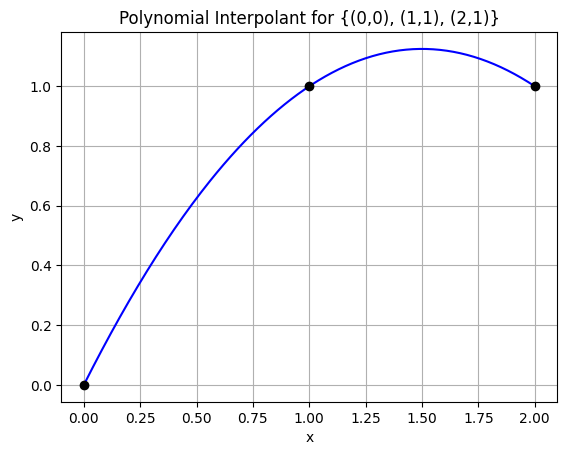

In [5]:
# Implementation of divided differences
# The first row of the table is returned
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

# Implementation of Newton's polynomial
def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

x = np.array([0, 1, 2])
y = np.array([0, 1, 1])
a = divided_diff(x, y)[0, :]

x_new = np.arange(0, 2, .01)
plt.plot(x_new, newton_poly(a, x, x_new), 'b', x, y, 'ko')
plt.title('Polynomial Interpolant for {(0,0), (1,1), (2,1)}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()